In [12]:
# 필요한 라이브러리
import statsmodels.api as sm
import pandas as pd
# target은 종속변수, feature는 독립변수와 같다.

df2 = pd.read_csv('전체기간.csv',index_col = 0)
df2.head()

,코스피,코스닥,SK㈜,롯데쇼핑,HD현대,서부티앤디,하나금융지주,SK리츠,롯데리츠,코람코라이프인프라리츠,신한서부티앤디리츠,코람코더원리츠
Date,,,,,,,,,,,,
2022-04-04,0.006588,0.007176,0.024845,0.014359,0.012963,0.004854,0.002066,0.006211,-0.005172,0.007764,0.009690,0.024263
2022-04-05,0.000471,0.005436,0.000000,-0.002022,0.009141,0.028986,-0.028866,-0.001543,-0.010399,0.009245,-0.003839,0.037225
2022-04-06,-0.008760,-0.009806,0.004040,-0.010132,-0.005435,-0.023474,0.007431,-0.010819,-0.012259,0.009160,0.015414,0.019576
2022-04-07,-0.014322,-0.016095,-0.010060,-0.021494,-0.007286,0.000000,-0.015806,0.006250,0.003546,0.019667,-0.001898,-0.011200
2022-04-08,0.001680,0.007306,0.008130,-0.011506,0.005505,0.004808,-0.007495,0.010870,0.014134,0.008902,0.020913,0.001618


In [2]:
df = df[['SK㈜','SK리츠']]

In [31]:
model = sm.OLS(df.iloc[:,1],df2.iloc[:,[2,5,6]])
fitted_model = model.fit()

In [32]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   SK리츠   R-squared (uncentered):                   0.077
Model:                            OLS   Adj. R-squared (uncentered):              0.071
Method:                 Least Squares   F-statistic:                              13.46
Date:                Fri, 19 Apr 2024   Prob (F-statistic):                    1.89e-08
Time:                        16:10:42   Log-Likelihood:                          1388.2
No. Observations:                 490   AIC:                                     -2770.
Df Residuals:                     487   BIC:                                     -2758.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SK㈜            0.0699      0.040      1.751      0.081      -0.009       0.148
서부티앤디          0.1107      0.033      3.399      0.001       0.047       0.175
하나금융지주         0.0785      0.038      2.090      0.037       0.005       0.152
==============================================================================
Omnibus:                       41.078   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.942
Skew:                           0.087   Prob(JB):                     2.09e-42
Kurtosis:                       6.061   Cond. No.                         1.97
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\geonh\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\geonh\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000376. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


GARCH parameters for Company A:
mu         -0.000243
omega       0.000004
alpha[1]    0.050000
beta[1]     0.930000
Name: params, dtype: float64

GARCH parameters for Company B:
mu         -0.000285
omega       0.000038
alpha[1]    0.050002
beta[1]     0.849998
Name: params, dtype: float64


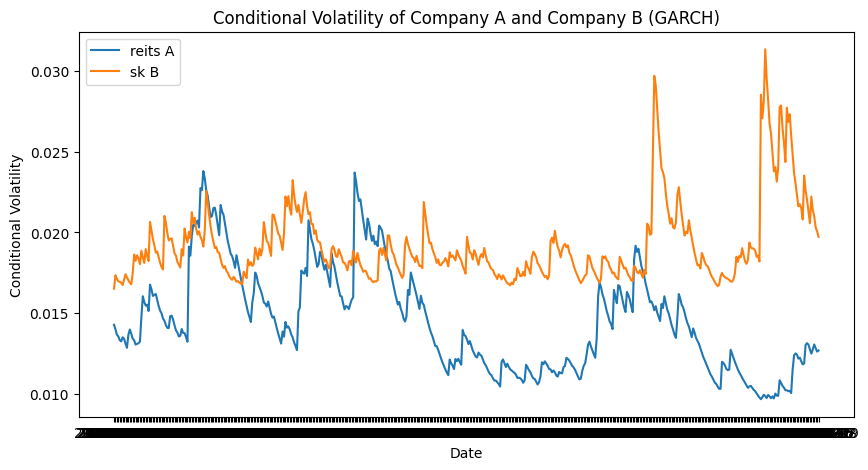

In [46]:
import arch
from arch import arch_model
import matplotlib.pyplot as plt

# GARCH(1,1) 모델을 각 주식에 대해 적합합니다.
garch_A = arch_model(df.iloc[:,1], vol='Garch', p=1, q=1)
garch_B = arch_model(df.iloc[:,0], vol='Garch', p=1, q=1)

# 모델을 적합합니다.
result_A = garch_A.fit(disp='off')
result_B = garch_B.fit(disp='off')

# 추정된 GARCH 파라미터를 출력합니다.
print("GARCH parameters for Company A:")
print(result_A.params)
print("\nGARCH parameters for Company B:")
print(result_B.params)

# 예측된 조건부 분산을 사용하여 변동성을 비교합니다.
cond_var_A = result_A.conditional_volatility
cond_var_B = result_B.conditional_volatility

# 두 주식의 예측된 조건부 분산을 비교합니다.
plt.figure(figsize=(10, 5))
plt.plot(df.index, cond_var_A, label='reits A')
plt.plot(df.index, cond_var_B, label='sk B')
plt.xlabel('Date')
plt.ylabel('Conditional Volatility')
plt.title('Conditional Volatility of Company A and Company B (GARCH)')
plt.legend()
plt.show()

In [47]:
result_A.resid

Date
2022-04-04    0.006454
2022-04-05   -0.001300
2022-04-06   -0.010576
2022-04-07    0.006493
2022-04-08    0.011113
                ...   
2024-03-25    0.017213
2024-03-26   -0.005716
2024-03-27   -0.005752
2024-03-28   -0.013026
2024-03-29    0.002688
Name: resid, Length: 490, dtype: float64

In [48]:
result_A.conditional_volatility

Date
2022-04-04    0.014280
2022-04-05    0.014004
2022-04-06    0.013669
2022-04-07    0.013555
2022-04-08    0.013318
                ...   
2024-03-25    0.012753
2024-03-26    0.013055
2024-03-27    0.012827
2024-03-28    0.012612
2024-03-29    0.012680
Name: cond_vol, Length: 490, dtype: float64